# Data analysis for the Diamond project

### Import
specific libraries we need for the data analysis;
### Create
the dataframe from the *csv* file we have uploaded and check useful information: if there are
*NaN* values, how many entries, how mamy columns...

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url_diamond = "/Users/francescoaldoventurelli/Desktop/diamonds/diamonds.csv"  ## paste the url
data_diamond = pd.read_csv(url_diamond)  # read with pandas method for csv

df = pd.DataFrame(data_diamond) # create and print the dataframe
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82
...,...,...,...,...,...,...,...,...,...,...
4995,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91
4996,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72
4997,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24
4998,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70


In [4]:
df.isnull().values.any()  ## check if there are NaN values; in the case they are, we remove them.

False

In [5]:
df.info()  # print useful information about the dataframe as data-types, number of entries...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   object 
 2   color    5000 non-null   object 
 3   clarity  5000 non-null   object 
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   price    5000 non-null   int64  
 7   x        5000 non-null   float64
 8   y        5000 non-null   float64
 9   z        5000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 390.8+ KB


We can see that we have numerical (as depth, price, x,...) and categorical (color, clarity,...) data. We need to work them separately.

In [6]:
# assign to num_data and cate_data variables their corresponding items. Here I've split the data into numerical and categorical
num_data = df[["carat", "depth", "table", "price", "x", "y", "z"]]  
cate_data = df[["cut", "color", "clarity"]]

In [7]:
cate_data

,cut,color,clarity
0,Ideal,H,SI2
1,Ideal,H,SI1
2,Premium,I,SI1
3,Ideal,F,SI1
4,Very Good,F,VS2
...,...,...,...
4995,Ideal,H,VVS2
4996,Premium,G,VVS2
4997,Ideal,J,VVS2
4998,Premium,F,VS2


In [8]:
df.describe() ## Additional info such as mean value, standard deviation...

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82


### Correlation matrix
We display the correlation matrix for the numerical data we have in order to detect the positive and negative
correlations between data.

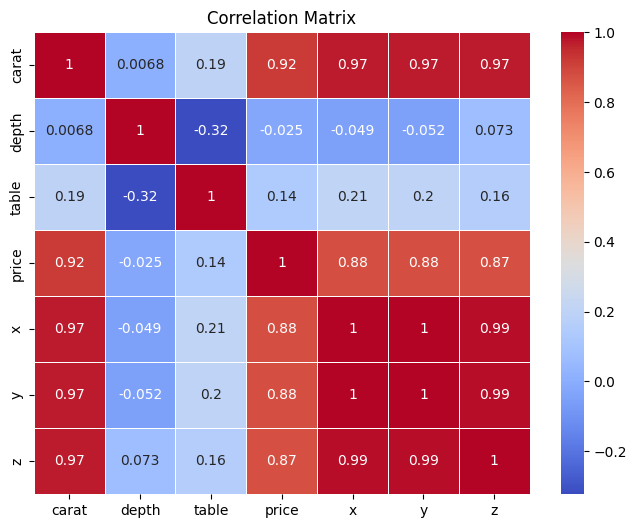

In [10]:
correlation_matrix = num_data.corr()  # call the correlation method to the numerical columns of the df
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

From the *correlation matrix* we can see that there is a positive correlation between *price* and *carat*, meaning
that more carat the diamond is composed by (i.e. the more it weights) the more it costs.

In [11]:
correlation_matrix["price"]

carat    0.918933
depth   -0.024915
table    0.140832
price    1.000000
x        0.878079
y        0.878892
z        0.871467
Name: price, dtype: float64

### Data visualization
Visualize some interesting features of our dataframe and make interesting plots:
1) ### count plots;
2) ### scatter plots.

In [12]:
yval = np.arange(0,1400,100)
yval2 = np.arange(0,600,50)
yval3 = np.arange(0,550,50)

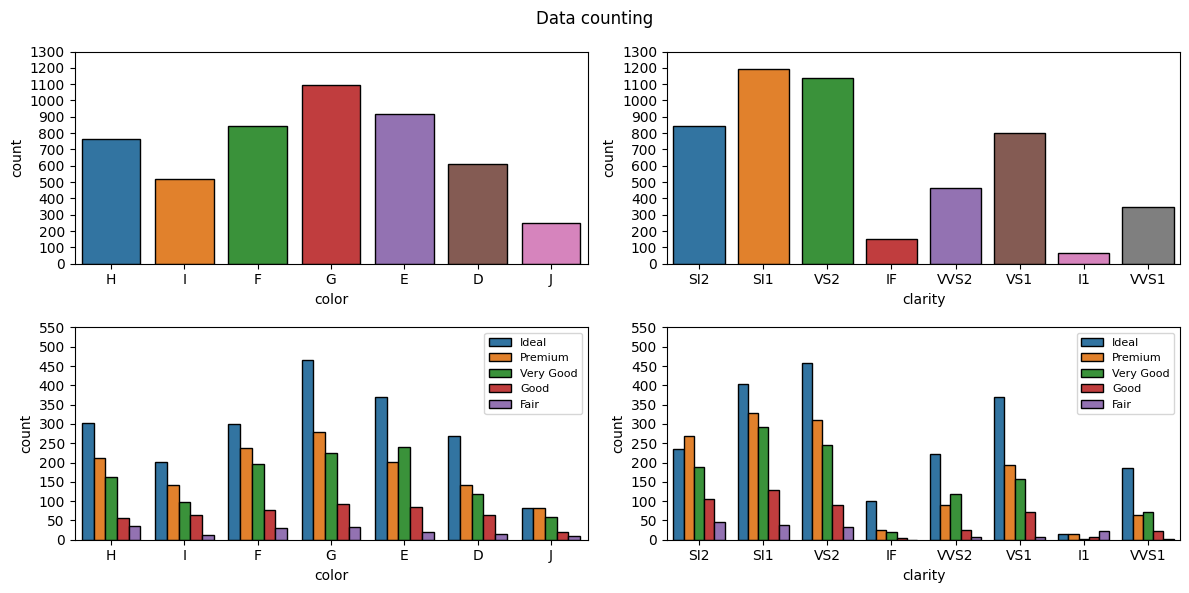

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('Data counting')
sns.countplot(data=df, x="color", ax=ax[0,0],edgecolor='k')
ax[0,0].set_ylim(0, len(yval))
ax[0,0].set_yticks(yval)
sns.countplot(data=df, x="clarity", ax=ax[0,1],edgecolor='k')
ax[0,1].set_ylim(0, len(yval))
ax[0,1].set_yticks(yval)
sns.countplot(data=df, x="color", ax=ax[1,0], hue="cut", edgecolor='k')
ax[1,0].legend(loc="best", fontsize=8)
ax[1,0].set_ylim(0, len(yval2))
ax[1,0].set_yticks(yval2)
sns.countplot(data=df, x="clarity", ax=ax[1,1], hue="cut", edgecolor='k')
ax[1,1].legend(loc="best", fontsize=8)
ax[1,1].set_ylim(0, len(yval2))
ax[1,1].set_yticks(yval2)
plt.tight_layout()


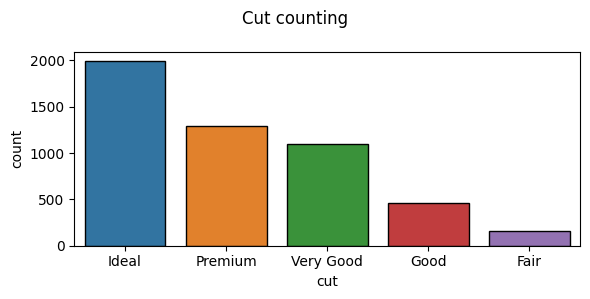

In [14]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x="cut",edgecolor='k')
plt.suptitle("Cut counting")
plt.tight_layout()

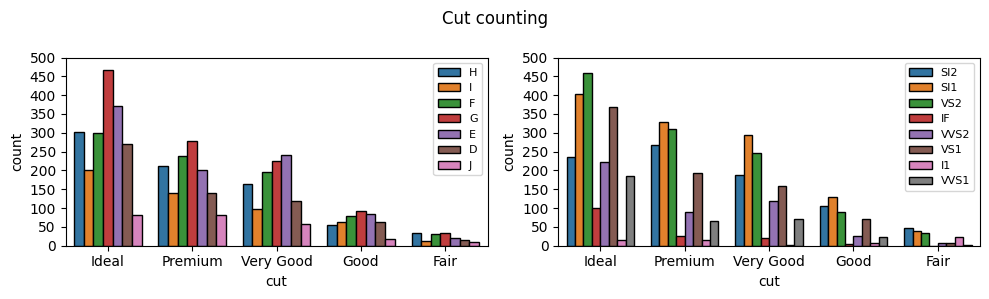

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
fig.suptitle('Cut counting')
sns.countplot(data=df, x="cut", ax=ax1, hue="color",edgecolor='k')
ax1.legend(loc="best", fontsize=8)
ax1.set_ylim(0, len(yval3))
ax1.set_yticks(yval3)
sns.countplot(data=df, x="cut", ax=ax2, hue="clarity",edgecolor='k')
ax2.legend(loc="best",fontsize=8)
ax2.set_ylim(0, len(yval3))
ax2.set_yticks(yval3)

plt.tight_layout()

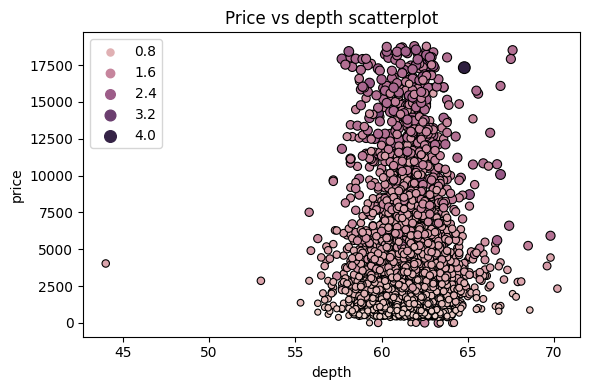

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="depth", y="price", hue="carat", size="carat", edgecolor='k', linewidth=0.8)
plt.legend(loc="best", fontsize=10)
plt.title("Price vs depth scatterplot")
plt.tight_layout()

In [17]:
y4 = np.arange(0,30000,10000)

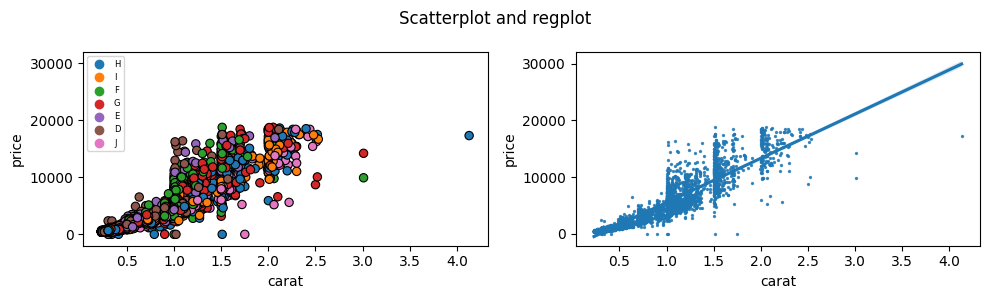

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
fig.suptitle('Scatterplot and regplot')
sns.scatterplot(data=df,x="carat", y="price", hue="color", ax=ax1, edgecolor='k', linewidth=0.8)
ax1.set_ylim(-2000,32000)
ax1.legend(loc="best", fontsize=6)
sns.regplot(data=df, x="carat", y="price", fit_reg=True, ax=ax2, scatter_kws={'s':2})


plt.tight_layout()

From the correlation matrix we we expecting positive correlation between *price* and *carat*, infact there is a correlation, but we have few data for *carat* values larger than 2.5

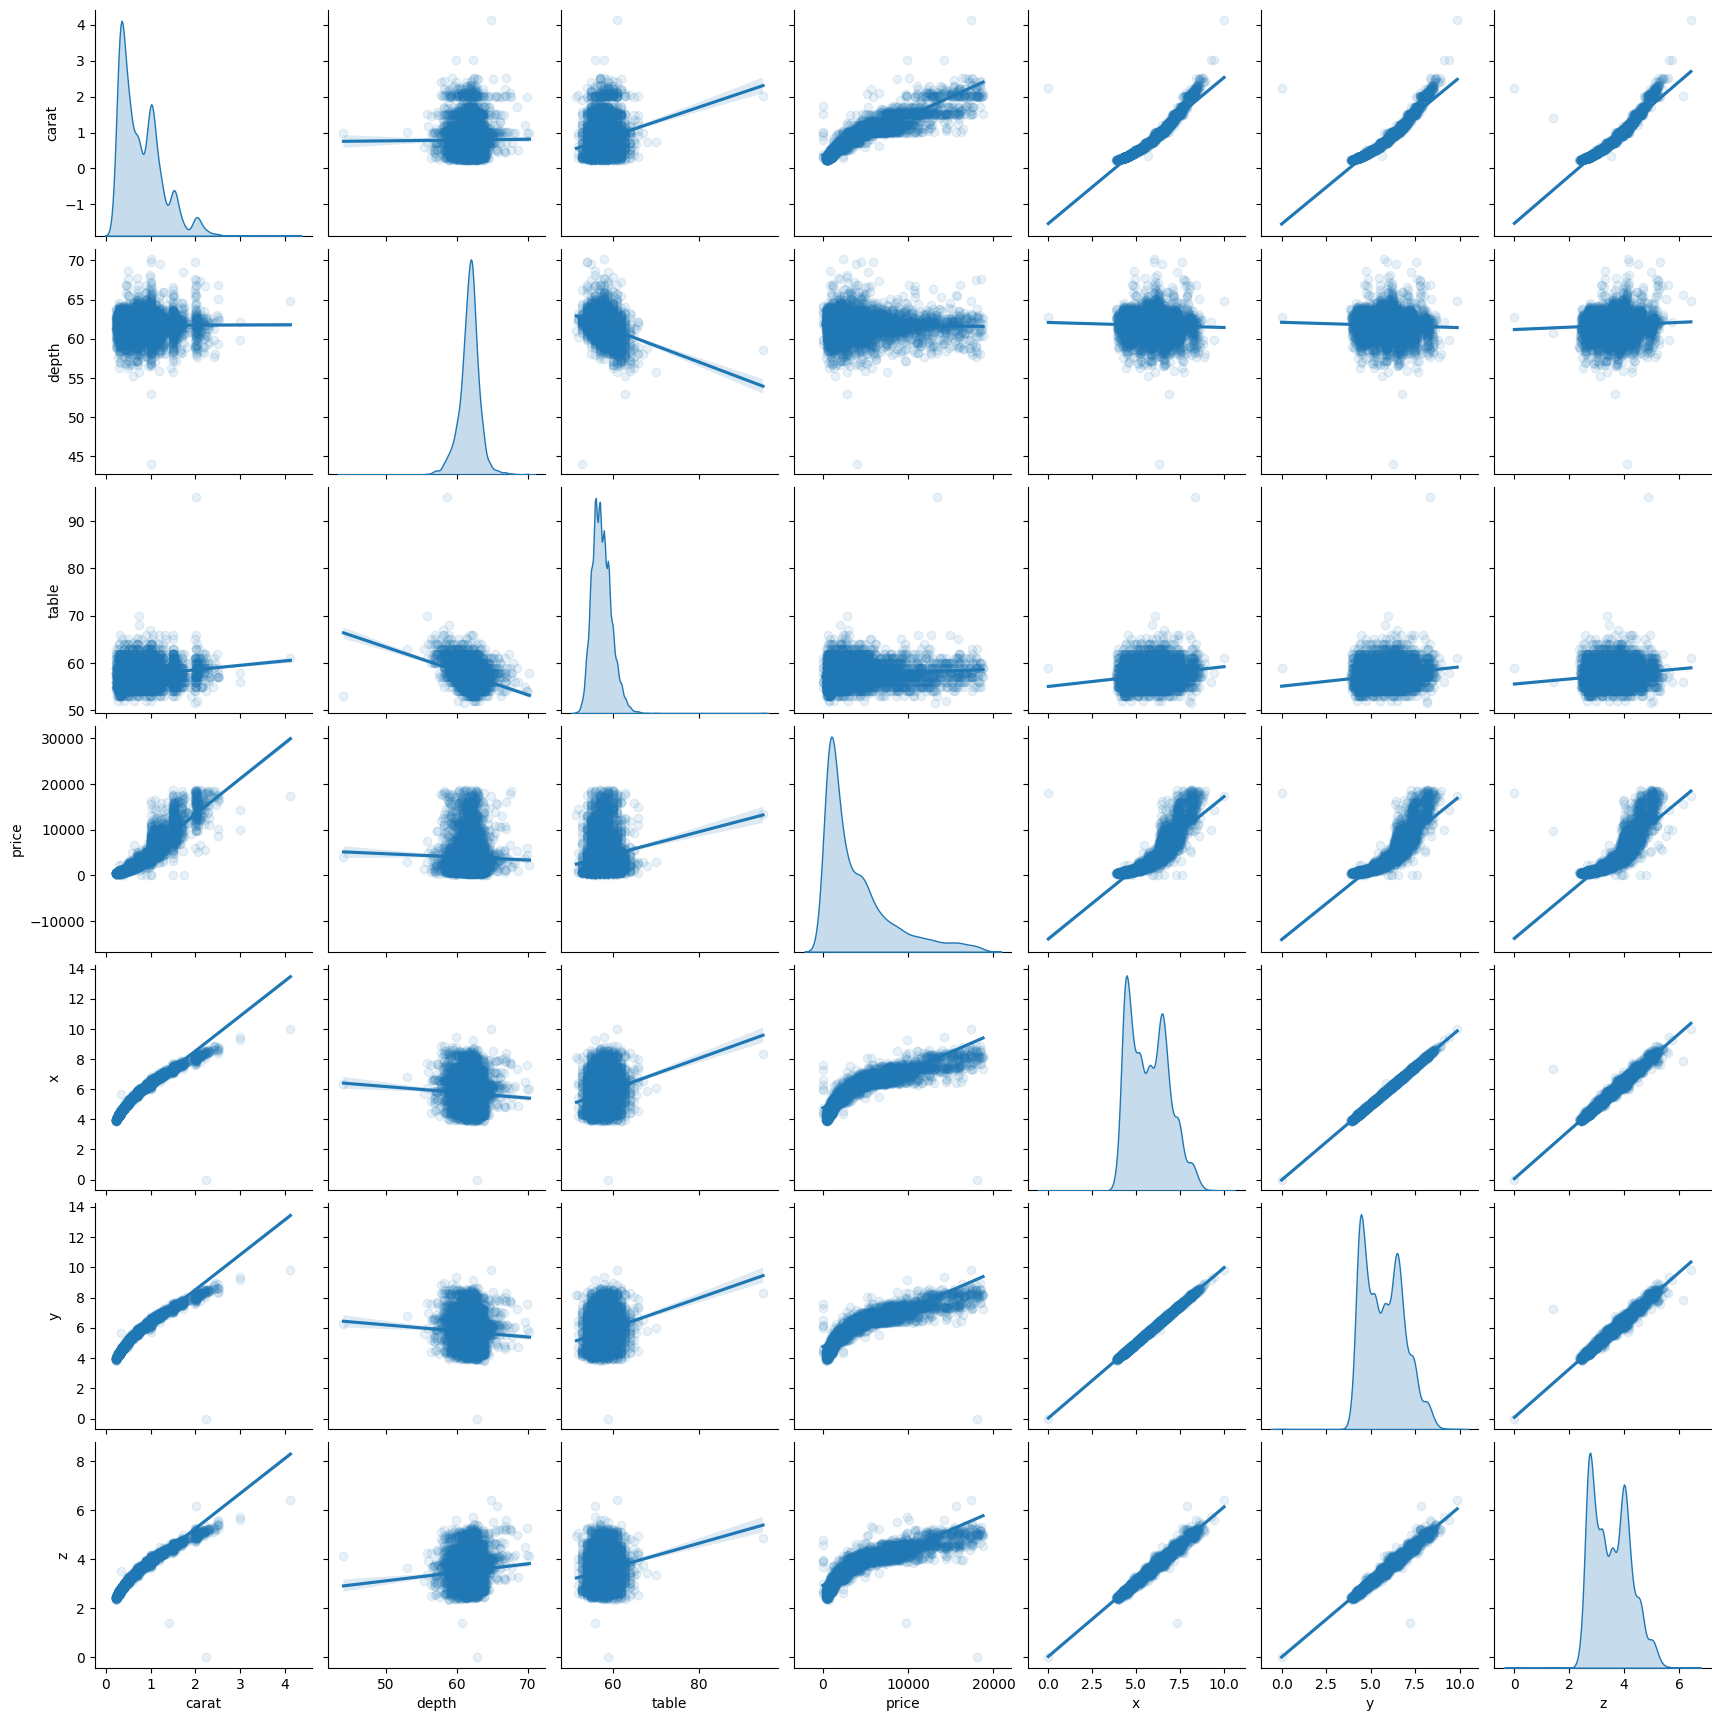

In [19]:
sns.pairplot(df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']], kind="reg", diag_kind="kde", 
            plot_kws={"scatter_kws": {"alpha": 0.1}})
plt.show()

# Boxplot

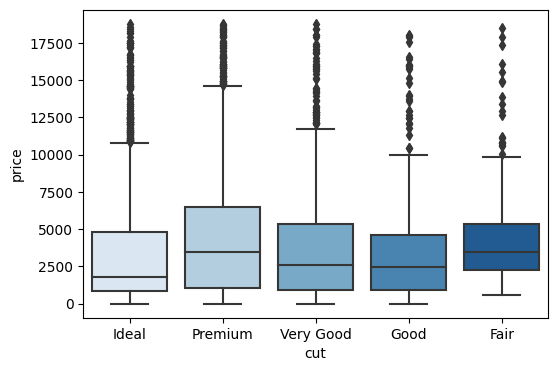

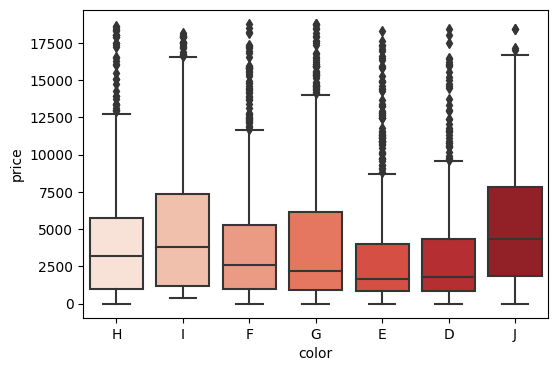

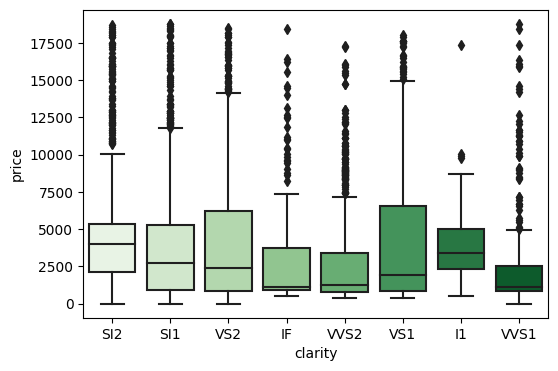

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x='cut', y='price', data=df, palette="Blues")


plt.figure(figsize=(6,4))
sns.boxplot(x='color', y='price', data=df, palette="Reds")


plt.figure(figsize=(6,4))
sns.boxplot(x='clarity', y='price', data=df, palette="Greens")
plt.show()